In [1]:
using OperatorApproximation, Plots

[ Info: Precompiling OperatorApproximation [c7ec8986-4b84-48ba-9795-9bd526637602]


In [25]:
δ = .08
b = 1/(δ^(1)*sqrt(6))
c = b^3*δ^2
a = (6c)/b;
ss = 0.1
q0 = x -> 1/a*cos((x)*pi/b-0.1*pi)
L = 2*b

10.206207261596576

## Sparse ultraspherical

In [26]:
gd = ChebyshevMappedInterval(0.0,L)
sp = Ultraspherical(0.0,gd);
sp2 = Ultraspherical(2.0,gd);
D = Derivative()
C = Conversion(sp2)
M = Multiplication(q0)
Op = -D^2 - C*M
lbdry = FixedGridValues([0],gd) |> Conversion;
rbdry = FixedGridValues([L],gd) |> Conversion;
L2 = ((0*lbdry) ⊘ (0*rbdry) ⊘ C)*sp
L1 = (lbdry ⊘ rbdry ⊘ Op)*sp;
E = eigen(L1,L2,400);
(E.values |> real |> sort)[1:10]

10-element Vector{Float64}:
 -0.06362207764739117
  0.4323997569320811
  1.0388504765965814
  1.612500963427311
  2.424064506438312
  3.4490254818894686
  4.670261318616832
  6.0848765684448365
  7.691119567505878
  9.488158884056189

## Collocation

In [27]:
gd = ChebyshevMappedInterval(0.0,L)
sp = Ultraspherical(0.0,gd);
sp2 = Ultraspherical(2.0,gd);
D = Derivative()
gv = GridValues(gd)
E = Conversion(gv)
M = Multiplication(q0)
Op = -(E*D^2) - M*E
lbdry = FixedGridValues([0],gd) |> Conversion;
rbdry = FixedGridValues([L],gd) |> Conversion;
L2 = ((0*lbdry) ⊘ (0*rbdry) ⊘ E)*sp
L1 = (lbdry ⊘ rbdry ⊘ Op)*sp;
E = eigen(L1,L2,400)
(E.values |> real |> sort)[1:10]

10-element Vector{Float64}:
 -0.06362207762131226
  0.4323997569417209
  1.0388504765566104
  1.612500963439636
  2.42406450665014
  3.44902548190008
  4.670261318545289
  6.084876568468324
  7.691119567768198
  9.488158884077857

In [28]:
dir_evals = (E.values |> real |> sort)[1:10]

10-element Vector{Float64}:
 -0.06362207762131226
  0.4323997569417209
  1.0388504765566104
  1.612500963439636
  2.42406450665014
  3.44902548190008
  4.670261318545289
  6.084876568468324
  7.691119567768198
  9.488158884077857

In [29]:
gd = PeriodicMappedInterval(0.0,2L)
sp = Fourier(gd);
D = Derivative()
M = Multiplication(q0)
Op = -D^2 - M
L1 = Op*sp;
E = eigen(L1,300);
evals = E.values |> real |> sort;

In [30]:
α1 = evals[1] |> real

-0.5903366434877294

In [31]:
gaps = hcat(evals[2:2:20] |> real,evals[3:2:21] |> real)

10×2 Matrix{Float64}:
 -0.589564  0.160649
  0.180168  0.718802
  0.873261  1.11822
  1.58261   1.63404
  2.4224    2.42721
  3.44882   3.44908
  4.67026   4.67027
  6.08488   6.08488
  7.69112   7.69112
  9.48816   9.48816

### Should be one Dirichlet eigenvalue in each gap

In [32]:
hcat(gaps,dir_evals) 

10×3 Matrix{Float64}:
 -0.589564  0.160649  -0.0636221
  0.180168  0.718802   0.4324
  0.873261  1.11822    1.03885
  1.58261   1.63404    1.6125
  2.4224    2.42721    2.42406
  3.44882   3.44908    3.44903
  4.67026   4.67027    4.67026
  6.08488   6.08488    6.08488
  7.69112   7.69112    7.69112
  9.48816   9.48816    9.48816

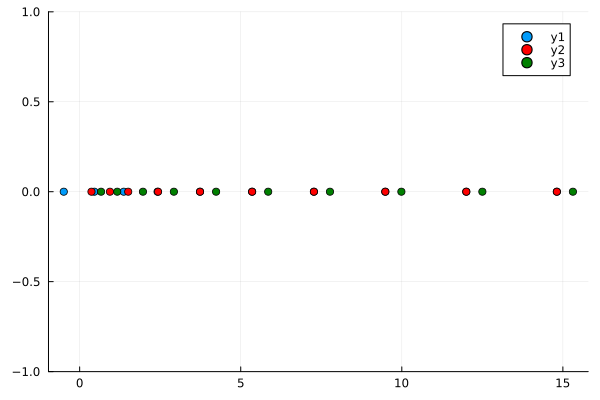

In [24]:
scatter(gaps[:,1],0*gaps[:,1], yaxis = [-1,1])
scatter!(gaps[:,2],0*gaps[:,1],markercolor = :red)
scatter!(dir_evals_shift,0*dir_evals,markercolor = :green)